In [3]:
import os, sys
path = os.chdir(os.getcwd()+"/..")
print(path)
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from Ensembler.src.system import system
from  Ensembler.src.potentials.OneD import harmonicOsc
from  Ensembler.src.potentials.ND import envelopedPotential

from  Ensembler.src.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator, positionVerletIntegrator, velocityVerletIntegrator
from  Ensembler.src.conditions.thermostats import berendsenThermostate
from  Ensembler.visualisation.plotSimulations import static_sim_plots
from  Ensembler.visualisation.animationSimulation import animation_trajectory


None


# Plots of Simulations

## Newtonian Integrator

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%
init_state State(position=-10, temperature=298.0, totEnergy=51.19245289104852, totPotEnergy=50.0, totKinEnergy=1.1924528910485213, dhdpos=nan, velocity=-1.5443140166744076) 

last_state:  State(position=nan, temperature=298.0, totEnergy=nan, totPotEnergy=nan, totKinEnergy=nan, dhdpos=nan, velocity=nan) 

Trajectory length:  10000


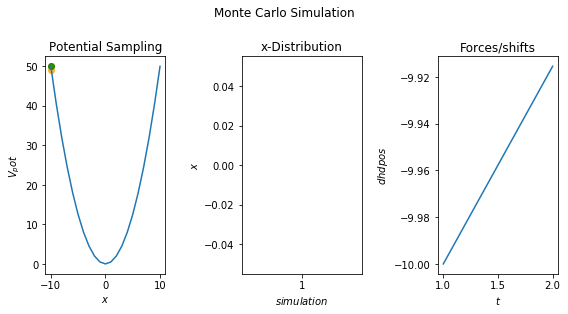

In [14]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!
# The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
thermo = berendsenThermostate(tau=3,dt=0.01)
integrator = positionVerletIntegrator(dt=0.01)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#plot
static_sim_plots(sys, title="Monte Carlo Simulation", x_range=list(range(-10,11)))

# Animations of Simulations

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
INTEGRATOR: current forces	  -10.0
INTEGRATOR: current Velocities	  3.10010795360161
INTEGRATOR: current_position	  -10
INTEGRATOR: newVel	  13.10010795360161
INTEGRATOR: newPosition	  3.1001079536016096


INTEGRATOR: current forces	  3.1001079536016096
INTEGRATOR: current Velocities	  13.10010795360161
INTEGRATOR: current_position	  3.1001079536016096
INTEGRATOR: newVel	  10.0
INTEGRATOR: newPosition	  13.10010795360161


INTEGRATOR: current forces	  13.10010795360161
INTEGRATOR: current Velocities	  10.0
INTEGRATOR: current_position	  13.10010795360161
INTEGRATOR: newVel	  -3.1001079536016096
INTEGRATOR: newPosition	  10.0


INTEGRATOR: current forces	  10.0
INTEGRATOR: current Velocities	  -3.1001079536016096
INTEGRATOR: current_position	  10.0
INTEGRATOR: newVel	  -13.10010795360161
INTEGRATOR: newPosition	  -3.1001079536016096


INTEGRATOR: current forces	  -3.1001079536016096
INTEGRATOR: current Velocities	  -13.10010

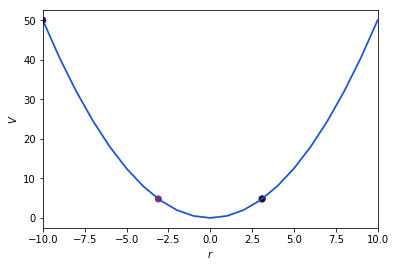

In [16]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 10
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
#thermo = berendsenThermostate(tau=3, dt=1, MConstraintsDims=-1)
#thermo.verbose = True
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
integrator.verbose = True
sys=system(potential=pot, integrator=integrator,  position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

In [19]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
thermo = berendsenThermostate(tau=20, dt=1)
#thermo.verbose = True
integrator = velocityVerletIntegrator(dt=1)#maxStepSize=max_step_size,
#integrator.verbose = True
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-5, temperature=0)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1


TypeError: can only concatenate str (not "type") to str